<a href="https://colab.research.google.com/github/sohelshekhatik1998/DATA-SCIENCE-TASK/blob/main/train_chennai_houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#load data
df = pd.read_csv('/content/train-chennai-sale.csv')

In [3]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [9]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [10]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [11]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [12]:
#Timing to do
#1.check spelling mistake
#2.check duplicates values
#3.check types of data in each column
#4.check missing values
#5.drop unnecessary columns

#1.Check spelling mistake#


In [13]:
#find catg. columns
cat_columns=df.select_dtypes('object')
cat_columns.head(10)


,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C
5,P00219,Chrompet,11-09-2014,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH
6,P09105,Chrompet,05-04-2007,Partial,No,12-04-1979,Other,AllPub,No Access,RL
7,P09679,Velachery,13-03-2006,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM
8,P03377,Chrompet,06-04-2011,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM
9,P09623,Velachery,22-06-2006,AbNormal,No,26-06-1991,Others,ELO,No Access,I


In [14]:
#Numeric columns
numeric_cols=df.select_dtypes(exclude=['object'])
numeric_cols.head(10)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250
5,1220,36,2.0,1.0,4,4.5,2.6,3.1,3.320,409027,198316,12394750
6,1167,137,1.0,1.0,3,3.6,2.1,2.5,2.670,263152,33955,8488790
7,1847,176,3.0,2.0,5,2.4,4.5,2.1,3.260,604809,235204,16800250
8,771,175,1.0,1.0,2,2.9,3.7,4.0,3.550,257578,33236,8308970
9,1635,74,2.0,1.0,4,3.1,3.1,3.3,3.160,323346,121255,8083650


In [15]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [16]:
#count all value of area
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [17]:
#correct misspelled area names
misspelled_area_names={
    'Chrompt':'Chrompet',
    'Chrmpet':'Chrompet',
    'Chormpet':'Chrompet',
    'Karapakam':'Karapakkam',
    'TNagar':'T Nagar',
    'Ana Nagar':'Anna Nagar',
    'Ann Nagar ':'Anna Nagar',
    'Ann Nagar':'Anna Nagar',
    'Adyr':'Adyar',
    'Velchery':'Velachery',
    'KKNagar':'KK Nagar'
}
#replace mispelled area names
df['AREA']=df.AREA.replace(misspelled_area_names)

In [18]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [19]:
#misspelled names in sale_cond
cat_columns.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [20]:
#replace misspelled value in sale cond
df['SALE_COND']=df.SALE_COND.replace({'Adj Land':'AdjLand ','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})
df.SALE_COND.value_counts()

Partial        1433
AdjLand        1433
Normal Sale    1423
AbNormal       1411
Family         1403
AdjLand           6
Name: SALE_COND, dtype: int64

In [21]:
#misspelled words in park facii columns
cat_columns.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [22]:
df['PARK_FACIL']=df.PARK_FACIL.replace({'Noo':'No'})
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [23]:
cat_columns.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [24]:
df['BUILDTYPE']=df.BUILDTYPE.replace({'Other':'Others','Comercial':'Commercial'})
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [25]:
cat_columns.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [26]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'})
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [27]:
cat_columns.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [28]:
df['STREET']=df['STREET'].replace({'NoAccess':'No Access','Pavd':'Paved'})
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [29]:
cat_columns.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [30]:
#2.convert date time coumns to datetime type
df['DATE_SALE']=pd.to_datetime(df.DATE_SALE)
df['DATE_BUILD']=pd.to_datetime(df.DATE_BUILD)

In [31]:
#3. check duplicate value
df.duplicated().any()

False

In [32]:
#insatall package 
!pip install missingno

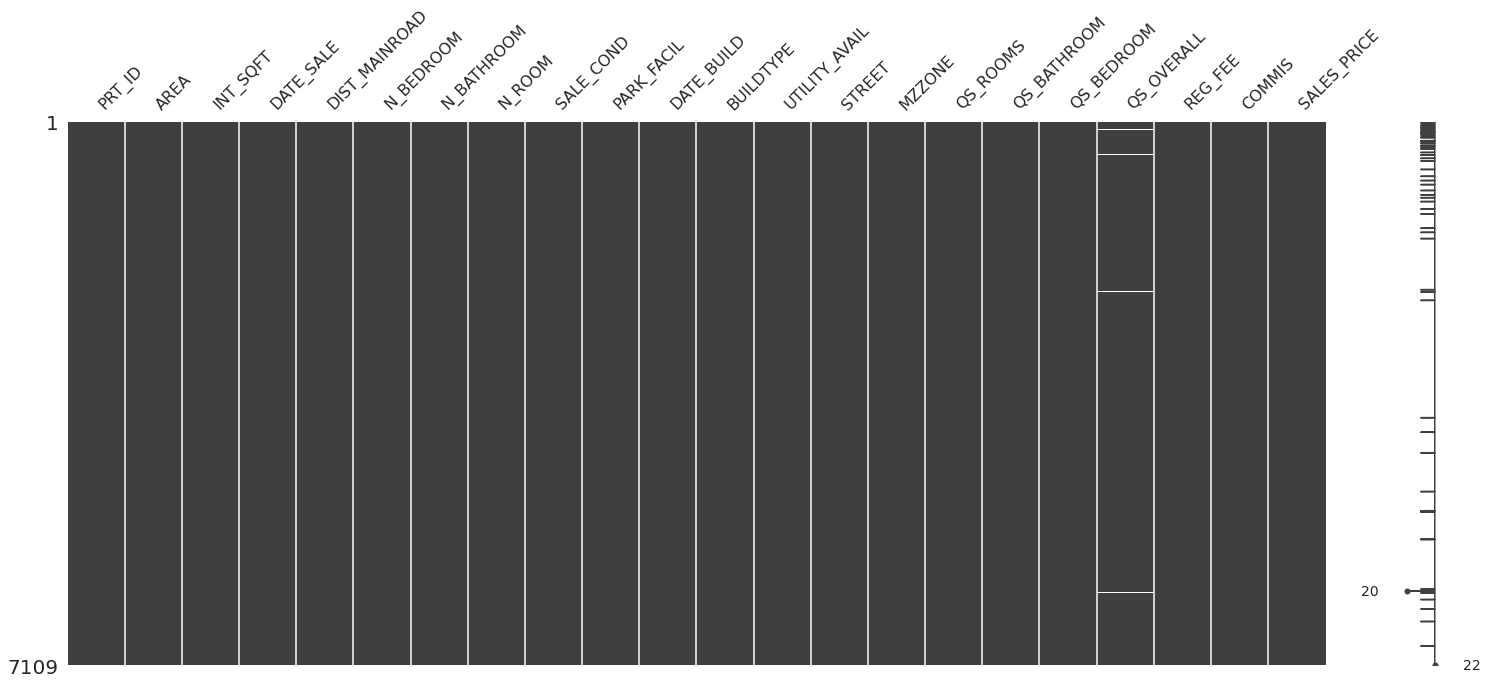

In [33]:
#msno used for checking correlation betn all column
import missingno as msno
msno.matrix(df)

In [34]:
df.isna().sum()/df.shape[0]*100

PRT_ID           0.000000
AREA             0.000000
INT_SQFT         0.000000
DATE_SALE        0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
DATE_BUILD       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
QS_ROOMS         0.000000
QS_BATHROOM      0.000000
QS_BEDROOM       0.000000
QS_OVERALL       0.675200
REG_FEE          0.000000
COMMIS           0.000000
SALES_PRICE      0.000000
dtype: float64

In [35]:
#check null value
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [36]:
df[pd.isnull(numeric_cols['QS_OVERALL'])][:30]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
15,P06328,Velachery,1868,2009-12-09,148,3.0,2.0,5,Family,No,...,NoSewr,Gravel,RH,3.8,3.8,3.1,NaN,597135,188569,15714080
46,P09483,T Nagar,1882,2006-11-18,189,2.0,1.0,5,AbNormal,Yes,...,ELO,Gravel,RM,3.9,4.5,4.7,NaN,433393,272877,16051580
86,P00545,Chrompet,1085,2014-01-19,149,1.0,1.0,3,AbNormal,Yes,...,NoSewr,Gravel,RL,2.8,3.8,4.6,NaN,387815,100545,14363500
111,P06768,Adyar,1034,2009-05-30,73,1.0,1.0,3,AdjLand,Yes,...,ELO,Gravel,C,3.8,3.3,3.5,NaN,277702,46284,9256740
134,P00089,T Nagar,1942,2014-12-20,10,2.0,1.0,5,Family,No,...,NoSeWa,Gravel,RH,4.6,3.1,2.9,NaN,320599,61654,12330740
143,P06226,Karapakkam,1430,2009-02-10,17,2.0,2.0,4,AbNormal,Yes,...,NoSewr,No Access,A,4.3,3.2,3.8,NaN,238887,106172,6635750
161,P06964,Velachery,1824,2009-03-04,187,3.0,2.0,5,Normal Sale,No,...,NoSewr,Paved,I,3.9,2.3,4.1,NaN,273570,76942,8549060
186,P08752,Adyar,738,2007-02-09,69,1.0,1.0,2,Partial,No,...,NoSewr,No Access,I,2.4,4.7,5.0,NaN,324194,8313,8312670
208,P03292,Karapakkam,1578,2011-04-18,153,2.0,2.0,4,Normal Sale,Yes,...,AllPub,Gravel,I,4.3,4.6,3.4,NaN,295508,238313,9532500
248,P04891,Velachery,1776,2010-09-06,120,2.0,1.0,4,Normal Sale,Yes,...,NoSeWa,Paved,RH,4.9,2.4,3.4,NaN,319653,89903,9989170


In [37]:
#install klib package
!pip install klib
!pip install --upgrade klib

     |████████████████████████████████| 133 kB 9.2 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


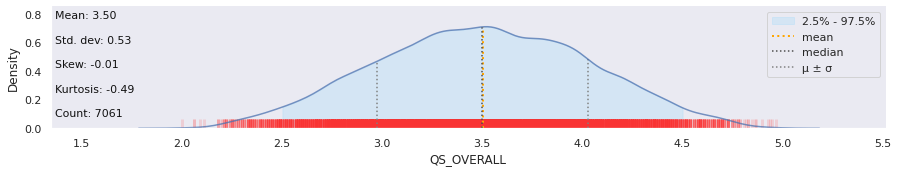

In [38]:
#used to check normal distribution in bet qs overall num value
import klib
klib.dist_plot(numeric_cols.QS_OVERALL);

In [39]:
#count all qs column
numeric_cols.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [40]:
#checking mean mode, mean , median 
numeric_cols.QS_OVERALL.mode()

0    3.54
dtype: float64

In [41]:
numeric_cols.QS_OVERALL.median()

3.5

In [42]:
numeric_cols.QS_OVERALL.isna().sum()

48

In [43]:
#covert all qs value to all qs mean value
df['QS_OVERALL']=df['QS_OVERALL'].replace(np.nan,df.QS_OVERALL.mean())

In [44]:
df.QS_OVERALL.isna().sum()

0

In [45]:
#MISSING VALUE IN BATHROOM COLUMN
numeric_cols.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [46]:
numeric_cols.N_BATHROOM.median()

1.0

In [47]:
numeric_cols.N_BATHROOM.mode()

0    1.0
dtype: float64

In [48]:
numeric_cols.N_BATHROOM.isna().sum()
#THE COLUMN N_BATHROOM IS A CATEGORICAL COLUMN THOUGH IT LOOKS LIKE NUMERIC
#IT'LL BE GOOD TO REPLACE WITH MODE VALUE. 

5

In [49]:
numeric_cols.N_BATHROOM.mode().values[0]

1.0

In [50]:
df['N_BATHROOM']=df['N_BATHROOM'].replace(np.nan, df.N_BATHROOM.mode().values[0])

In [51]:
#MISSING VALUES IN N_BEDROOM COLUMN
numeric_cols.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [52]:
numeric_cols.N_BEDROOM.mean()

1.6370287000562747

In [53]:
numeric_cols.N_BEDROOM.mode()

0    1.0
dtype: float64

In [54]:
numeric_cols.N_BEDROOM.isna().sum()

1

In [55]:
df['N_BEDROOM']=df['N_BEDROOM'].replace(np.nan,df.N_BEDROOM.mode().values[0])

In [56]:
df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [57]:
#CHANGE NECCESSARY NUMERIC COLUMNS TO CATEGORIES COLUMNS
cat_columns.columns

Index(['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')

In [58]:
numeric_cols.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [59]:
numeric_cols.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   float64       
 6   N_BATHROOM     7109 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [61]:
#sum of all income col
df['INF_PRICE']=df.SALES_PRICE+df.COMMIS+df.REG_FEE

In [62]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,8124400
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,22781941
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,13672408
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,10063653
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,5668827
7105,Velachery,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,11370222
7106,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,8835792
7107,Karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,9051448


In [63]:
#check datatype of date column
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df.dtypes.value_counts()

object            7
float64           6
int64             5
datetime64[ns]    2
dtype: int64

In [64]:
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year

In [65]:
#we calculate sold age as per given dates
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,A,4.0,3.9,4.9,4.330,7600000,8124400,1967,2011,44
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,RH,4.9,4.2,2.5,3.765,21717770,22781941,1995,2006,11
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,...,RL,4.1,3.8,2.2,3.090,13159200,13672408,1992,2012,20
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,I,4.7,3.9,3.6,4.010,9630290,10063653,1988,2010,22
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,C,3.0,2.5,4.1,3.290,7406250,7717313,1979,2009,30


In [66]:
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,...,A,4.0,3.9,4.9,4.330,7600000,8124400,1967,2011,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,...,RH,4.9,4.2,2.5,3.765,21717770,22781941,1995,2006,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,...,RL,4.1,3.8,2.2,3.090,13159200,13672408,1992,2012,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,...,I,4.7,3.9,3.6,4.010,9630290,10063653,1988,2010,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,...,C,3.0,2.5,4.1,3.290,7406250,7717313,1979,2009,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,...,RM,3.0,2.2,2.4,2.520,5353000,5668827,1962,2011,49
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,...,RH,3.6,4.5,3.3,3.920,10818480,11370222,1995,2004,9
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,...,I,4.3,4.2,2.9,3.840,8351410,8835792,1978,2006,28
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,...,RL,4.6,3.8,4.1,4.160,8507000,9051448,1977,2009,32


In [67]:
first_column = df.pop('SALES_PRICE')
df.insert(19,'SALES_PRICE', first_column)

In [68]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,INF_PRICE,BUILD_YEAR,SALE_YEAR,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,...,A,4.0,3.9,4.9,4.330,8124400,1967,2011,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,...,RH,4.9,4.2,2.5,3.765,22781941,1995,2006,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,...,RL,4.1,3.8,2.2,3.090,13672408,1992,2012,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,...,I,4.7,3.9,3.6,4.010,10063653,1988,2010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,...,C,3.0,2.5,4.1,3.290,7717313,1979,2009,7406250,30


In [69]:
#we check corr using klib 
klib.corr_mat(df)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,INF_PRICE,BUILD_YEAR,SALE_YEAR,SALES_PRICE,SOLD_AGE
INT_SQFT,1.00,0.00,0.79,0.52,0.95,0.02,-0.01,0.01,0.01,0.62,-0.01,-0.12,0.61,-0.01
DIST_MAINROAD,0.00,1.00,-0.00,0.00,0.00,0.00,-0.03,0.00,-0.02,0.02,0.01,0.01,0.02,-0.00
N_BEDROOM,0.79,-0.00,1.00,0.76,0.84,0.01,-0.01,0.02,0.01,0.34,0.01,-0.19,0.33,-0.05
N_BATHROOM,0.52,0.00,0.76,1.00,0.57,0.01,-0.01,0.01,0.01,0.12,0.00,-0.11,0.11,-0.02
N_ROOM,0.95,0.00,0.84,0.57,1.00,0.02,-0.01,0.02,0.02,0.61,0.01,-0.11,0.60,-0.03
QS_ROOMS,0.02,0.00,0.01,0.01,0.02,1.00,0.01,0.01,0.52,0.02,-0.02,0.00,0.02,0.02
QS_BATHROOM,-0.01,-0.03,-0.01,-0.01,-0.01,0.01,1.00,-0.01,0.55,-0.01,-0.02,-0.00,-0.01,0.02
QS_BEDROOM,0.01,0.00,0.02,0.01,0.02,0.01,-0.01,1.00,0.63,0.02,0.02,0.00,0.02,-0.02
QS_OVERALL,0.01,-0.02,0.01,0.01,0.02,0.52,0.55,0.63,1.00,0.02,-0.01,0.00,0.02,0.01
INF_PRICE,0.62,0.02,0.34,0.12,0.61,0.02,-0.01,0.02,0.02,1.00,0.12,-0.00,1.00,-0.12


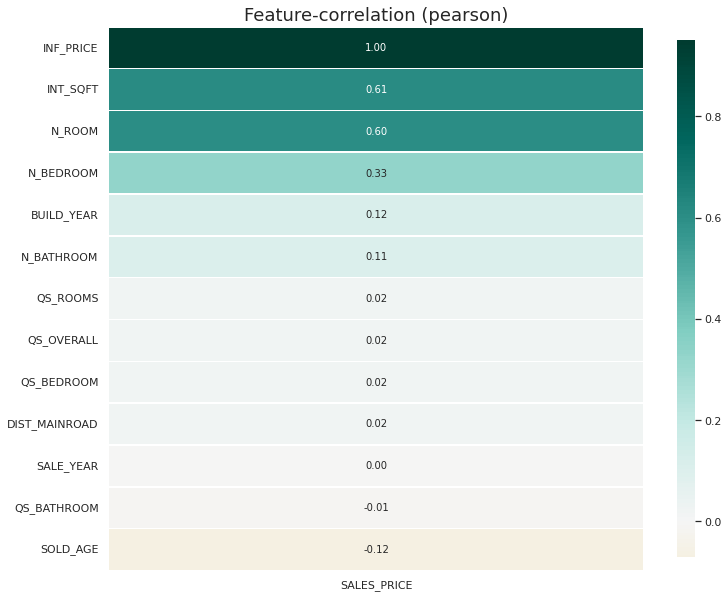

In [70]:
klib.corr_plot(df,target='SALES_PRICE')

GridSpec(6, 7)

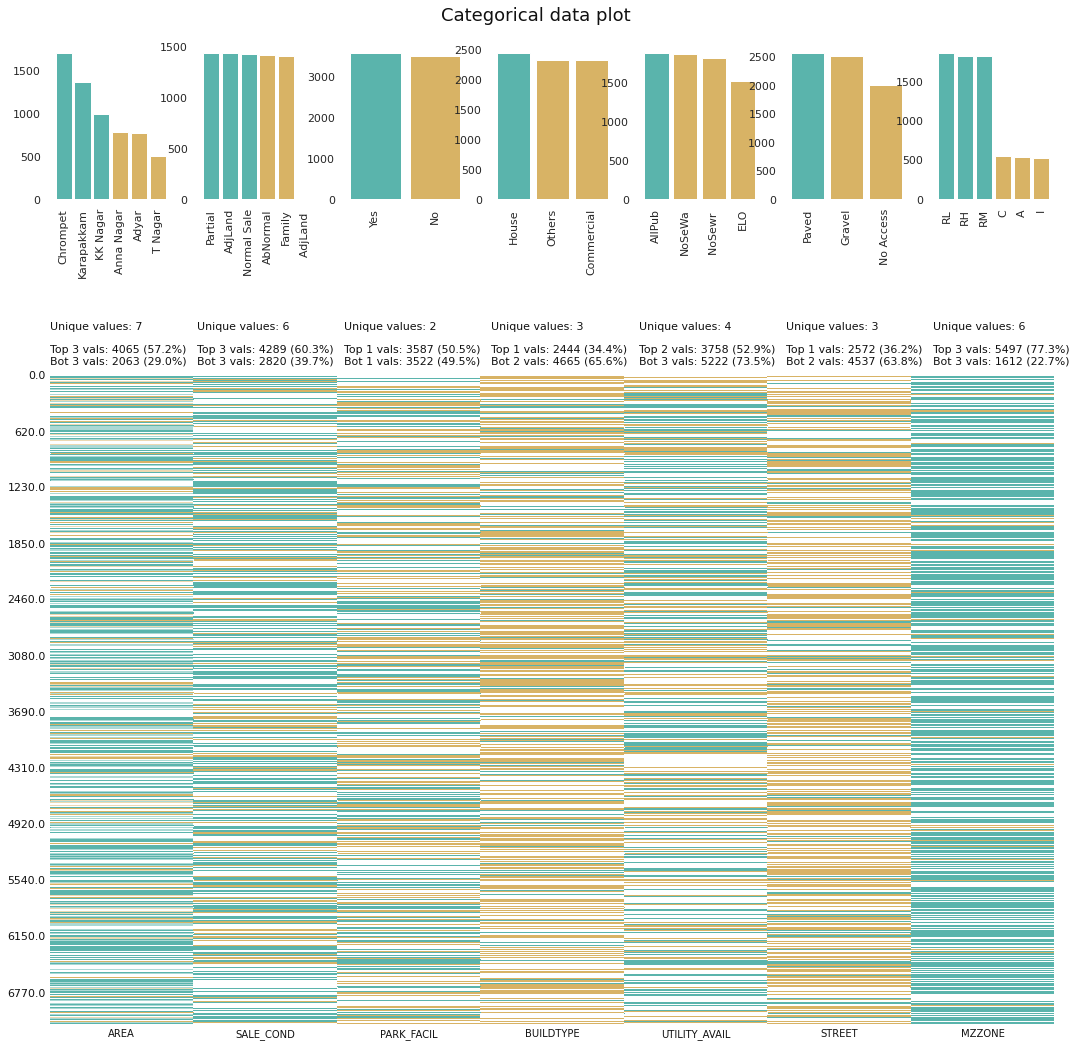

In [71]:
df1=df.select_dtypes(exclude=['int64','float64','datetime64'])
klib.cat_plot(df1)

In [72]:
df.shape

(7109, 21)

In [73]:
df.AREA.nunique()

7

BEFORE INFLATION AND AFTER INFLATION.


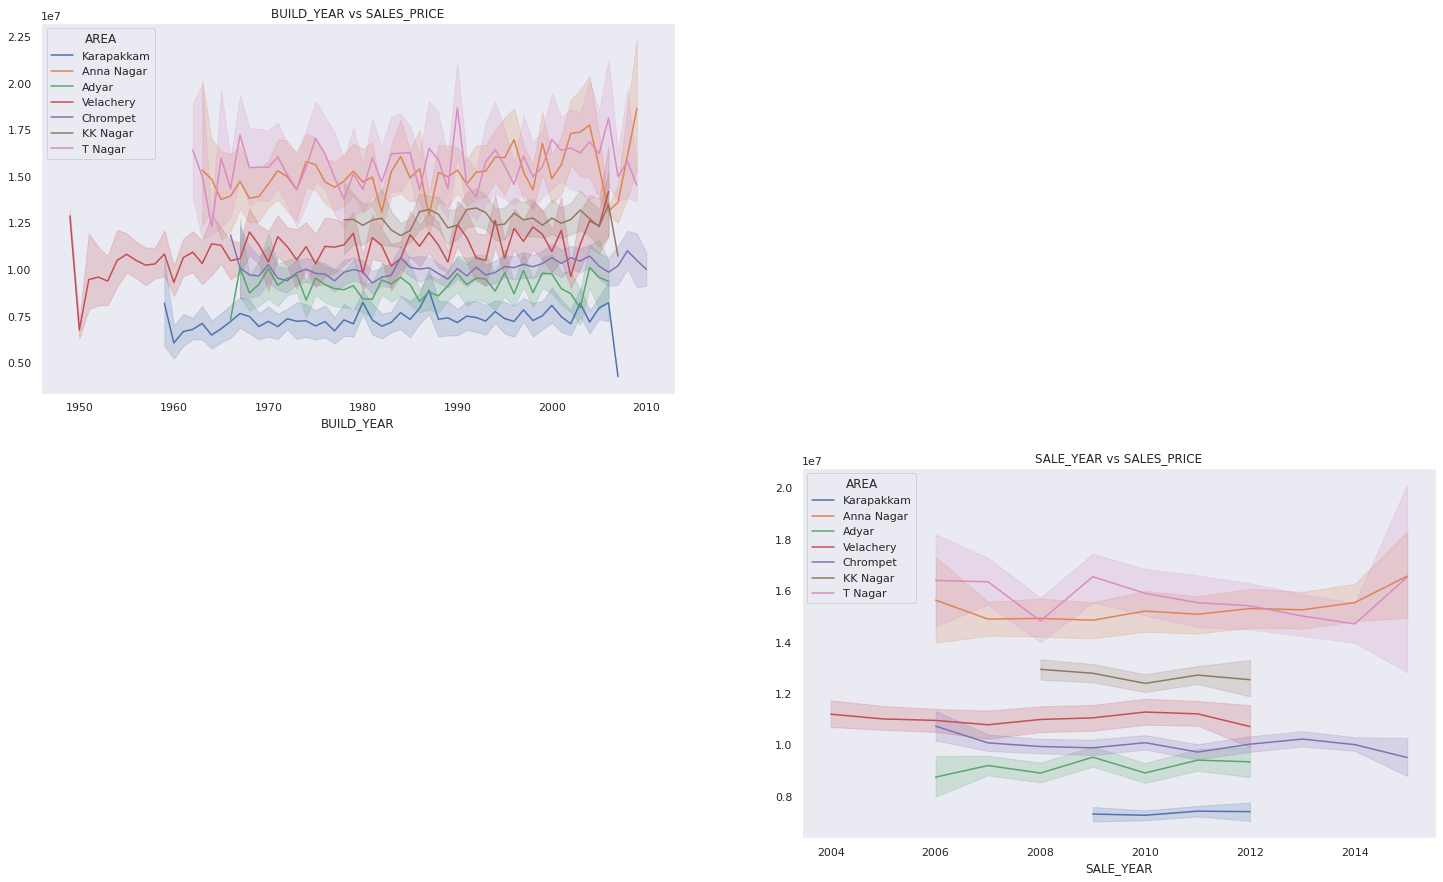

In [74]:
#
plt.figure(figsize=(25,15))
print('BEFORE INFLATION AND AFTER INFLATION.')
plt.subplot(221)
sns.lineplot(x = "BUILD_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.title('BUILD_YEAR vs SALES_PRICE')
plt.subplot(224)
sns.lineplot(x = "SALE_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

Text(0.5, 1.0, 'SALE_YEAR vs SALES_PRICE')

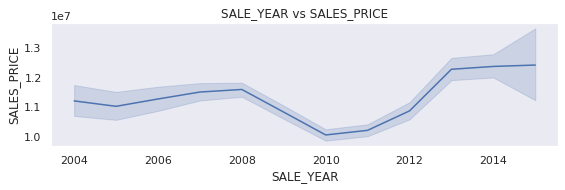

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(221)
sns.lineplot(x = "SALE_YEAR", y = df["SALES_PRICE"], data = df)
plt.title('SALE_YEAR vs SALES_PRICE')

In [76]:
A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

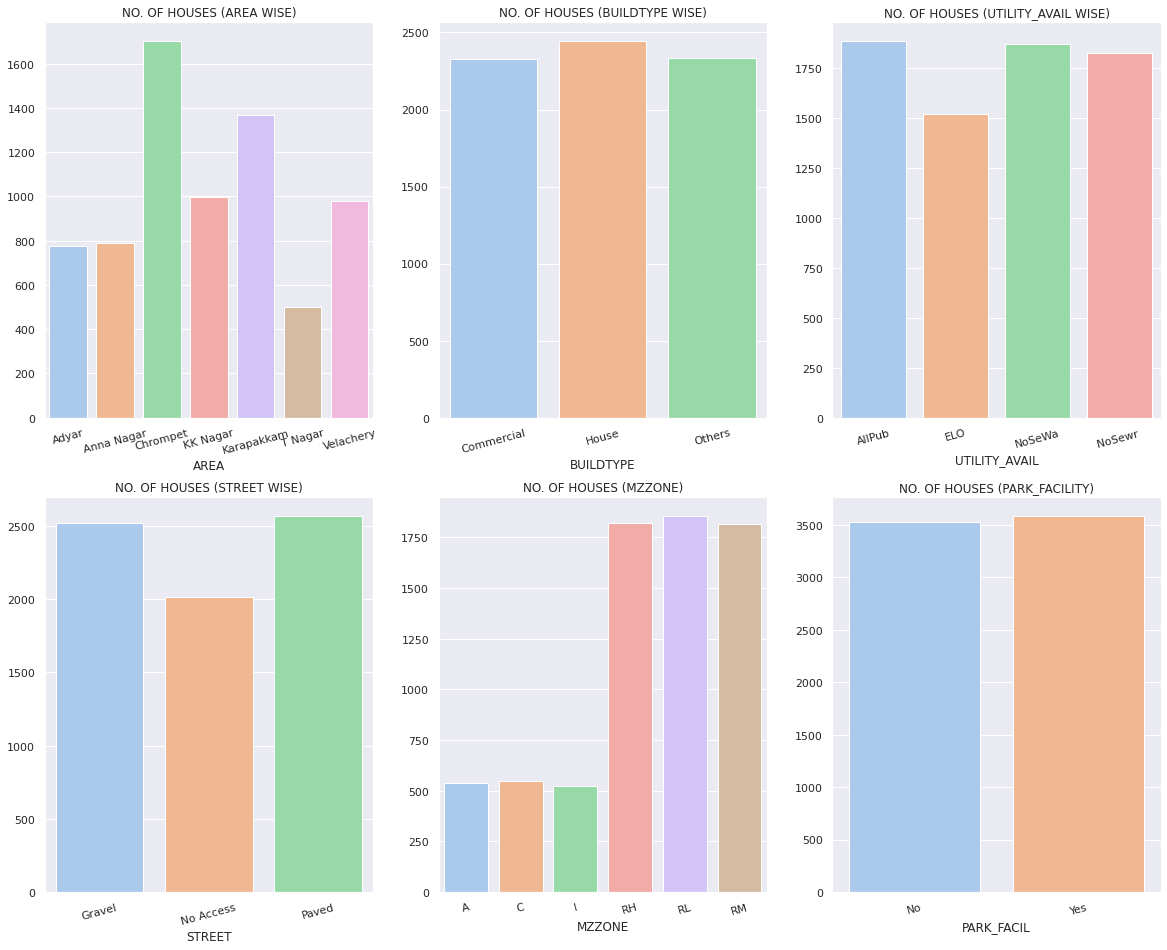

In [77]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

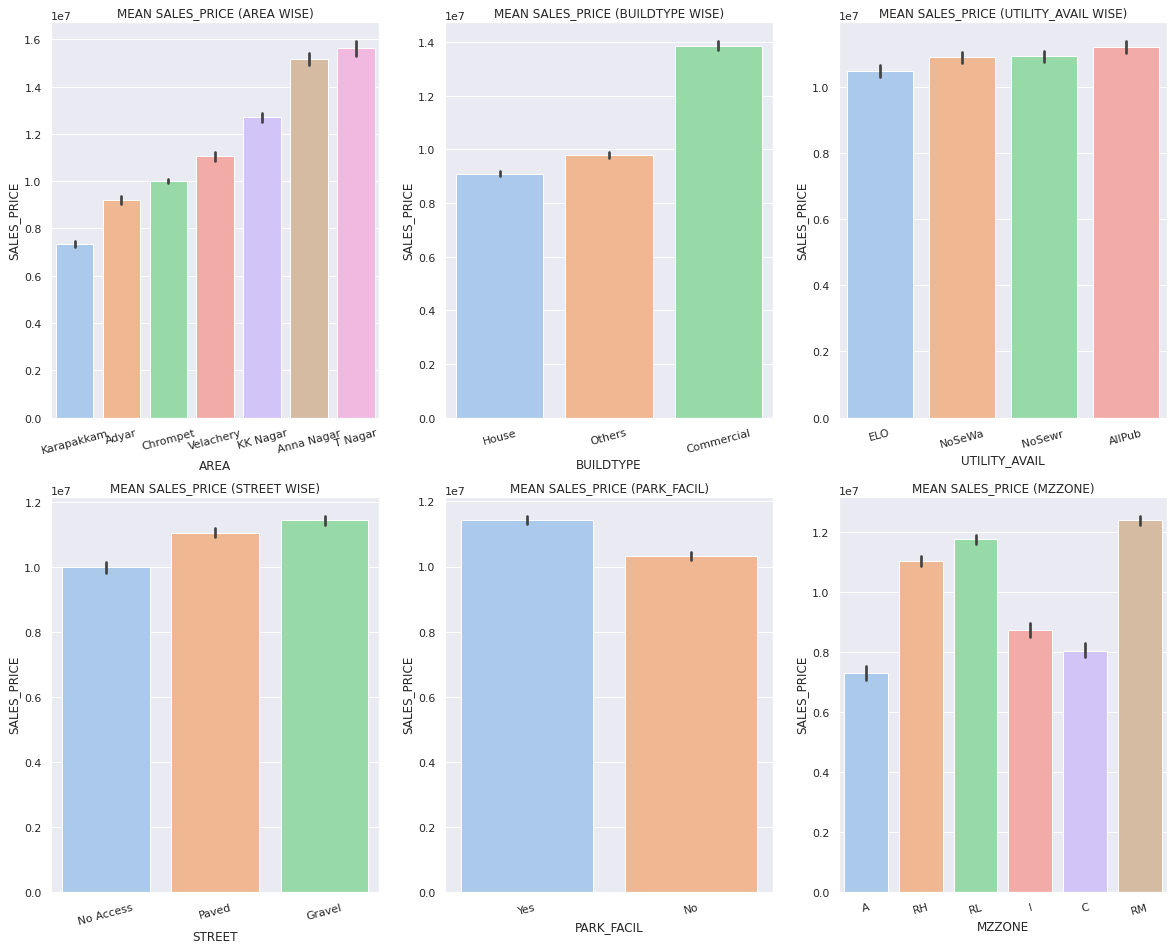

In [78]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (AREA WISE)')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET WISE)')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL)')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE)')
plt.show()

In [79]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'INF_PRICE', 'BUILD_YEAR', 'SALE_YEAR', 'SALES_PRICE',
       'SOLD_AGE'],
      dtype='object')

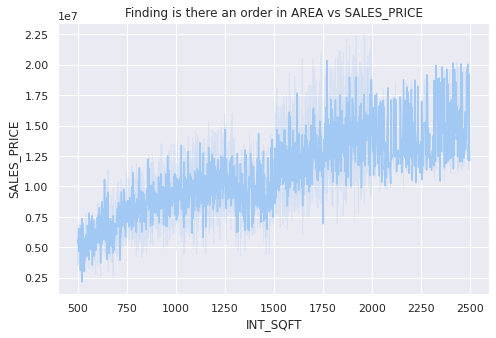

In [80]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['INT_SQFT'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

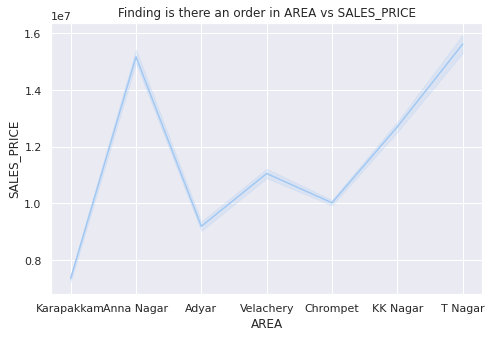

In [81]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['AREA'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

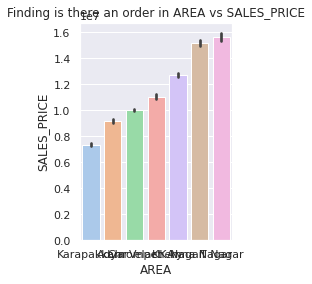

In [82]:
plt.subplot(122)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

Text(0.5, 1.0, 'Finding is there an order in AREA vs SALES_PRICE')

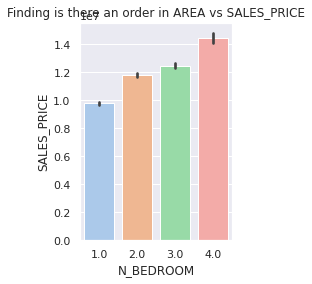

In [83]:
plt.subplot(122)
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')

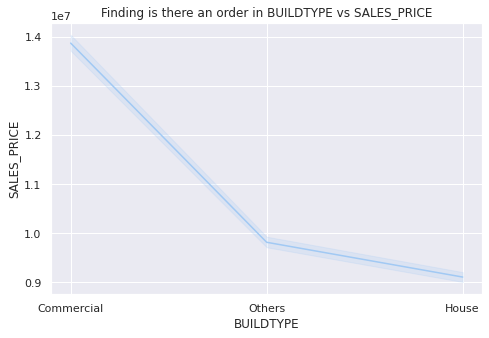

In [84]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

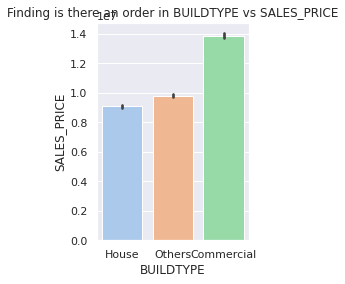

In [85]:
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

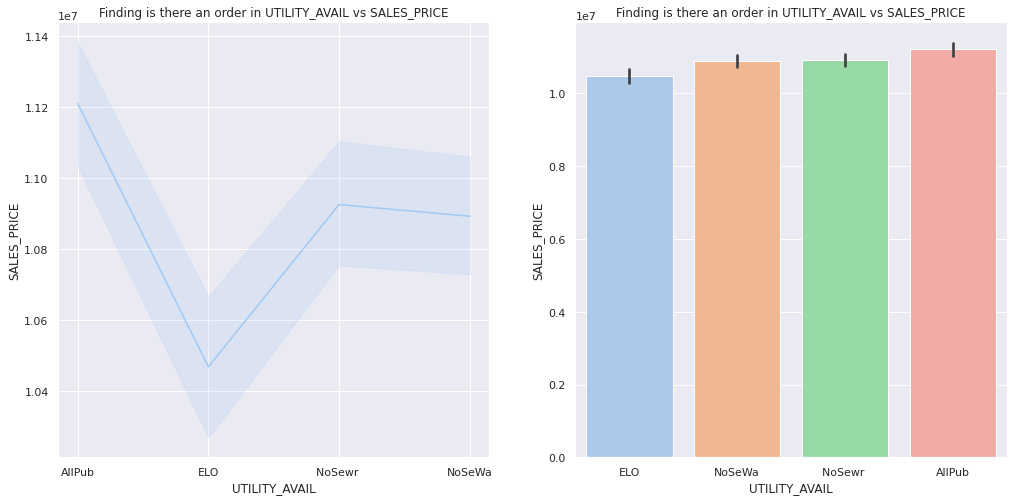

In [86]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.show()

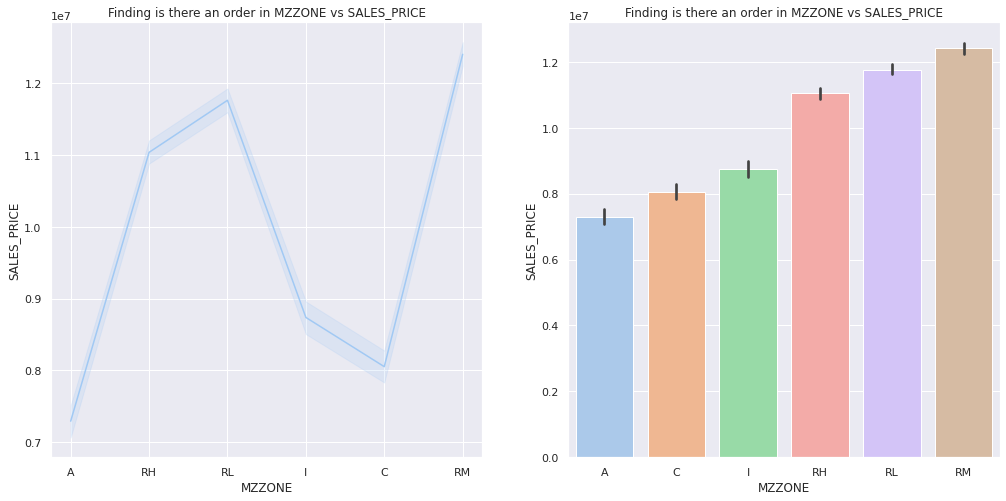

In [87]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['MZZONE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.show()

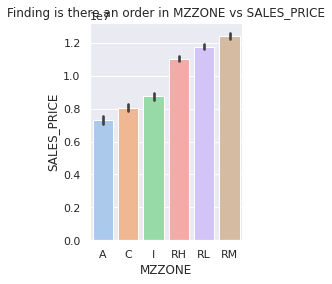

In [88]:
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.show()

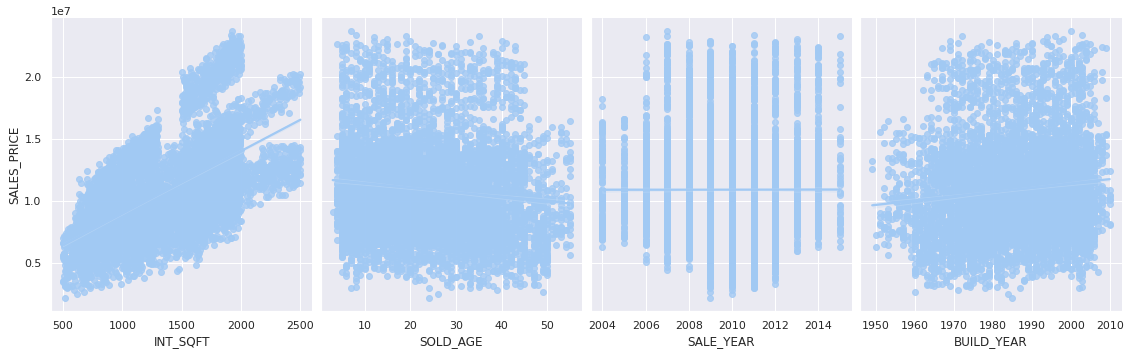

In [89]:
sns.pairplot(df,x_vars=["INT_SQFT", "SOLD_AGE","SALE_YEAR","BUILD_YEAR"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8, kind="reg")
plt.show()

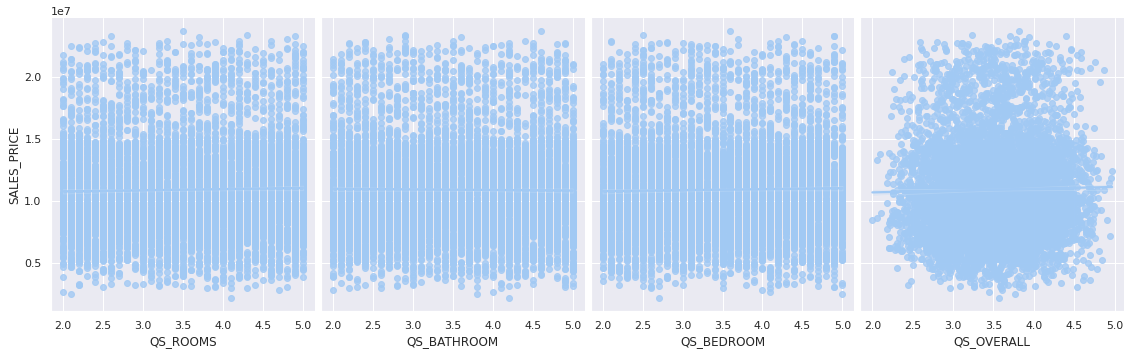

In [90]:
sns.pairplot(df,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

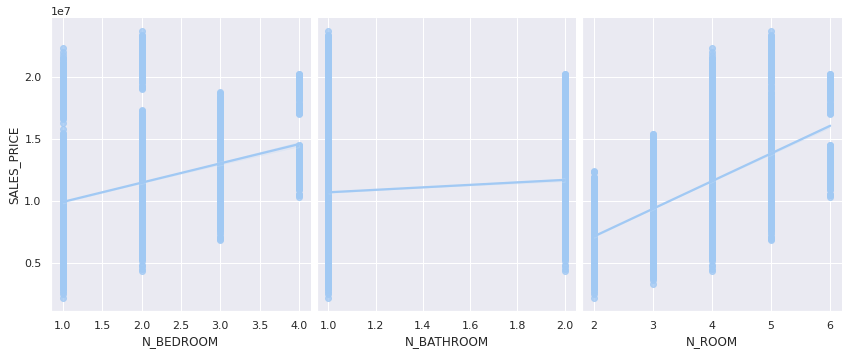

In [91]:
sns.pairplot(df,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

In [92]:
buildtype_fltr_C = df['BUILDTYPE']=='Commercial'
commercial=df.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
mean= commercial['SALES_PRICE'].mean()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

buildtype_fltr_H = df['BUILDTYPE']=='House'
House=df.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

buildtype_fltr_O = df['BUILDTYPE']=='Others'
Others=df.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Build_type_mmm = pd.concat([comm,house,others],axis=1)
Build_type_mmm = pd.DataFrame(Build_type_mmm.T)
Build_type_mmm["Build_type"]=["Commercial","House","Others"]

In [93]:
df.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,INF_PRICE,BUILD_YEAR,SALE_YEAR,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,...,A,4.0,3.9,4.9,4.330,8124400,1967,2011,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,...,RH,4.9,4.2,2.5,3.765,22781941,1995,2006,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,...,RL,4.1,3.8,2.2,3.090,13672408,1992,2012,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,...,I,4.7,3.9,3.6,4.010,10063653,1988,2010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,...,C,3.0,2.5,4.1,3.290,7717313,1979,2009,7406250,30
5,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,...,RH,4.5,2.6,3.1,3.320,13002093,2009,2014,12394750,5
6,Chrompet,1167,137,1.0,1.0,3,Partial,No,Others,AllPub,...,RL,3.6,2.1,2.5,2.670,8785897,1979,2007,8488790,28
7,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,...,RM,2.4,4.5,2.1,3.260,17640263,1996,2006,16800250,10
8,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,...,RM,2.9,3.7,4.0,3.550,8599784,1977,2011,8308970,34
9,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,...,I,3.1,3.1,3.3,3.160,8528251,1991,2006,8083650,15


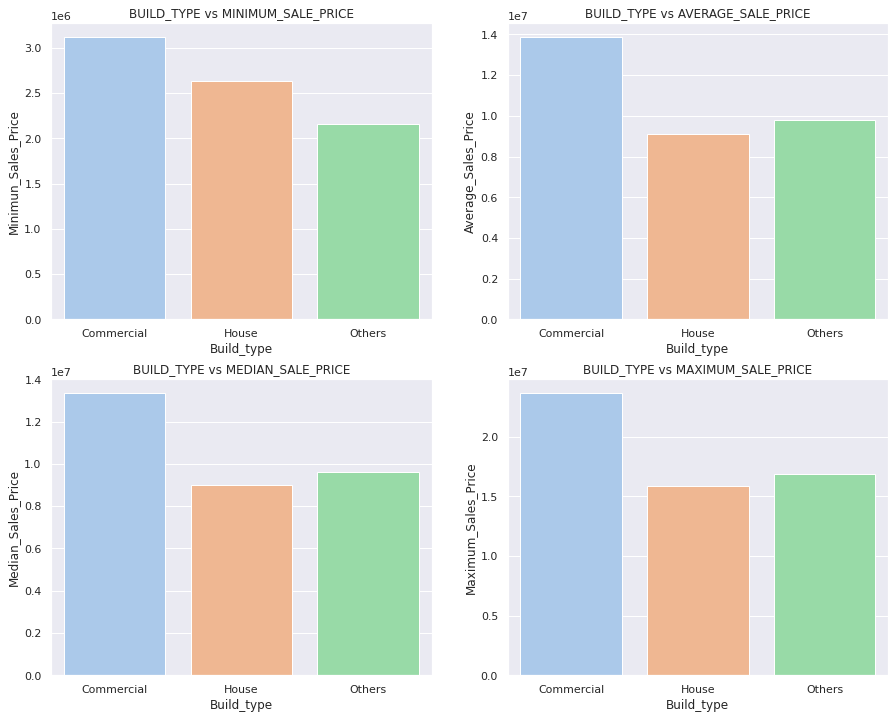

In [94]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Average_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

In [95]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [96]:
mean=df.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=df.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=df.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=df.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

In [97]:
Area_mmm

,Minimun_Sales_Price,Average_Sales_Price,Median_Sales_Price,Maximum_Sales_Price,AREA
AREA,,,,,
Adyar,3869180.0,9.185668e+06,3869180.0,17360470.0,Adyar
Anna Nagar,9593040.0,1.516820e+07,9593040.0,23407860.0,Anna Nagar
Chrompet,5340900.0,1.001381e+07,5340900.0,16026600.0,Chrompet
KK Nagar,7410200.0,1.269623e+07,7410200.0,20246360.0,KK Nagar
Karapakkam,2156875.0,7.340100e+06,2156875.0,14486250.0,Karapakam
T Nagar,9433610.0,1.561674e+07,9433610.0,23667340.0,T Nagar
Velachery,5574400.0,1.104735e+07,5574400.0,18298710.0,Velachery


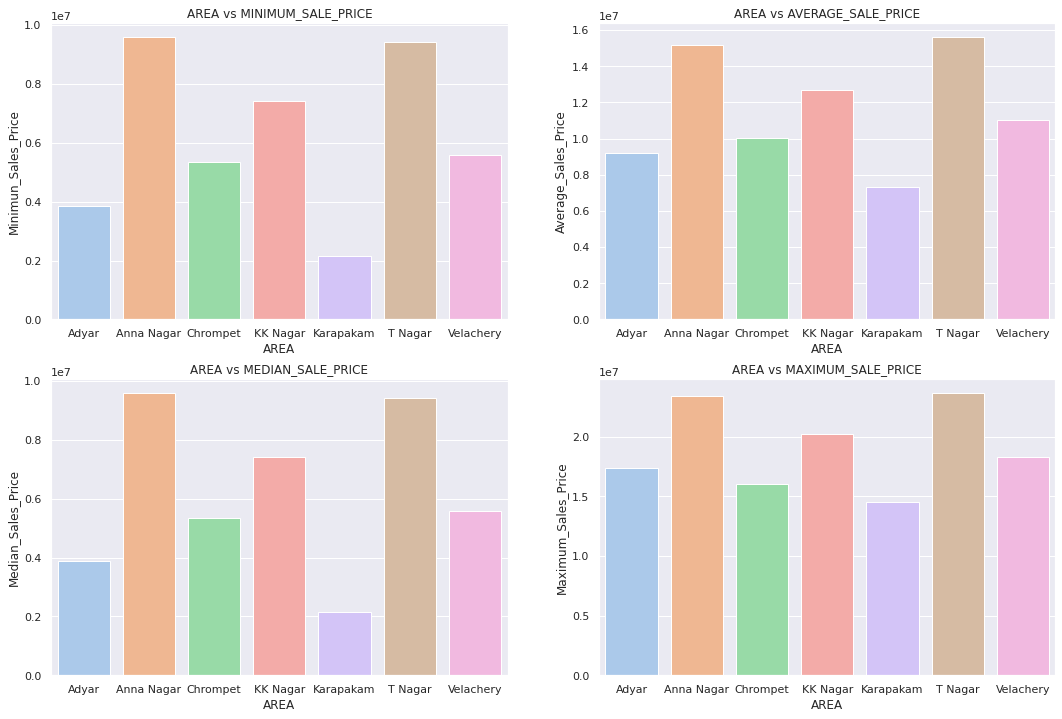

In [98]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

In [99]:
mean=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

In [100]:
mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

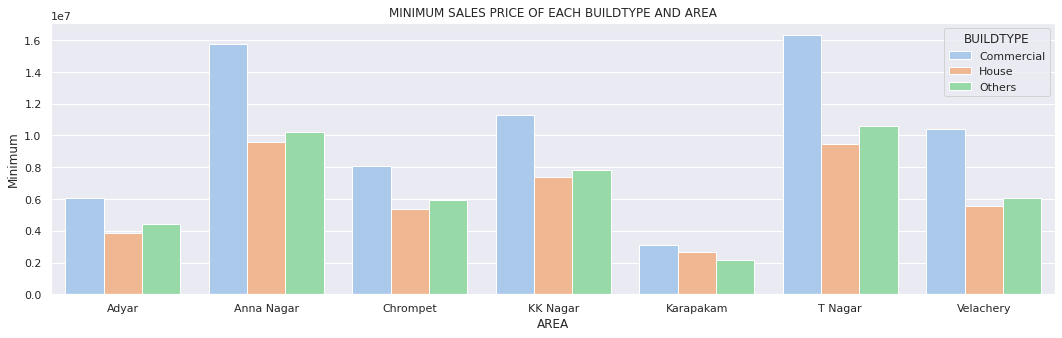

In [101]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

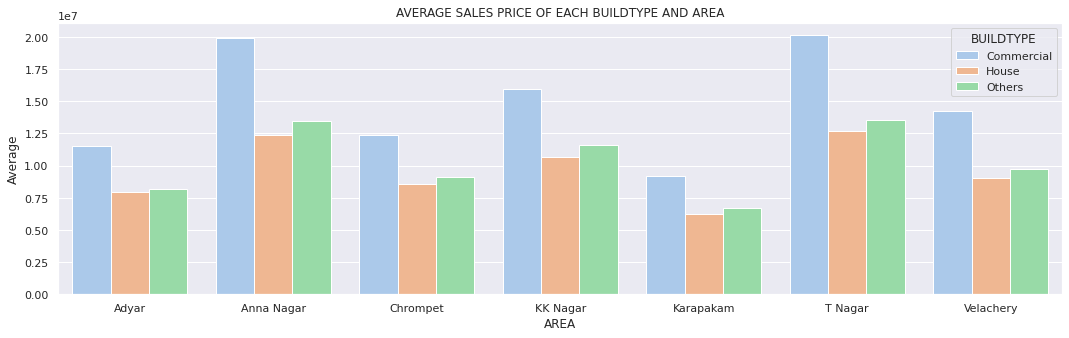

In [102]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

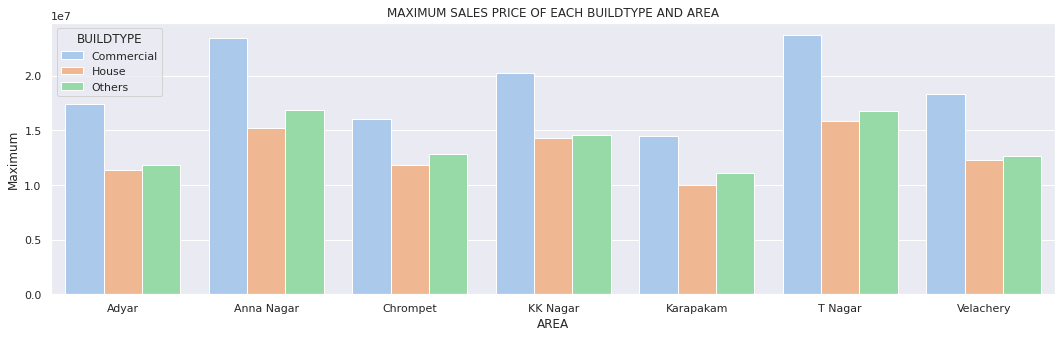

In [103]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

In [104]:
df.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,INF_PRICE,BUILD_YEAR,SALE_YEAR,SALES_PRICE,SOLD_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,...,A,4.0,3.9,4.9,4.330,8124400,1967,2011,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,...,RH,4.9,4.2,2.5,3.765,22781941,1995,2006,21717770,11


In [105]:
df.dtypes.value_counts()

int64      8
object     7
float64    6
dtype: int64

In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [107]:
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df['AREA']=le.fit_transform(df['AREA'])
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['SALE_COND']=le.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])

In [108]:
df.head(5)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,INF_PRICE,BUILD_YEAR,SALE_YEAR,SALES_PRICE,SOLD_AGE
0,4,1004,131,1.0,1.0,3,0,1,0,0,...,0,4.0,3.9,4.9,4.330,8124400,1967,2011,7600000,44
1,1,1986,26,2.0,1.0,5,0,0,0,0,...,3,4.9,4.2,2.5,3.765,22781941,1995,2006,21717770,11
2,0,909,70,1.0,1.0,3,0,1,0,1,...,4,4.1,3.8,2.2,3.090,13672408,1992,2012,13159200,20
3,6,1855,14,3.0,2.0,5,3,0,2,3,...,2,4.7,3.9,3.6,4.010,10063653,1988,2010,9630290,22
4,4,1226,84,1.0,1.0,3,0,1,2,0,...,1,3.0,2.5,4.1,3.290,7717313,1979,2009,7406250,30


In [109]:
X=df.drop(['SALES_PRICE','INF_PRICE'],axis=1)
y=df['SALES_PRICE']

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 19), (1422, 19), (5687,), (1422,))

In [111]:
X_train

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILD_YEAR,SALE_YEAR,SOLD_AGE
185,4,613,81,1.0,1.0,2,3,0,0,3,1,2,4.6,4.3,2.3,3.59,1980,2010,30
5403,4,1053,124,1.0,1.0,3,3,0,0,2,2,4,4.6,3.2,2.8,3.46,1985,2009,24
6974,6,1786,135,2.0,1.0,4,1,0,0,3,0,1,2.3,4.4,3.8,3.70,1956,2011,55
2115,2,963,104,1.0,1.0,3,5,0,0,0,1,5,4.7,4.2,2.0,3.69,1970,2009,39
4854,4,1533,118,2.0,2.0,4,3,0,1,1,0,4,2.8,3.1,5.0,3.77,2005,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,2,1259,112,2.0,1.0,4,0,0,1,1,0,4,3.8,3.4,2.5,3.25,1993,2009,16
3325,6,1906,6,3.0,2.0,5,3,0,2,3,0,1,4.1,2.3,4.2,3.32,1955,2009,54
1414,3,1386,101,2.0,1.0,4,5,1,0,2,2,5,3.5,4.9,3.3,3.84,2006,2011,5
5787,5,1915,195,2.0,1.0,5,0,1,2,3,2,5,3.6,3.4,3.8,3.64,1970,2008,38


In [112]:
X_test

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILD_YEAR,SALE_YEAR,SOLD_AGE
5115,2,1002,39,1.0,1.0,3,0,1,0,1,1,5,3.9,2.8,3.2,3.250,1970,2009,39
846,6,1897,1,3.0,2.0,5,1,0,1,3,1,5,4.5,3.5,2.1,3.330,1967,2007,40
1944,1,1981,126,2.0,1.0,5,3,0,0,3,1,4,2.0,2.0,4.6,3.040,1989,2008,19
3267,3,1373,61,2.0,1.0,4,4,1,1,0,2,4,4.7,2.6,3.5,3.590,2001,2008,7
2200,2,1124,24,1.0,1.0,3,1,0,0,2,1,5,3.8,2.4,4.3,3.390,1985,2009,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,5,1631,35,1.0,1.0,4,4,1,0,0,0,3,2.1,2.8,3.1,2.725,1967,2007,40
3997,2,747,78,1.0,1.0,2,3,0,1,2,1,4,2.9,3.1,3.6,3.190,1987,2009,22
3324,4,752,158,1.0,1.0,2,5,1,0,0,2,5,4.1,3.3,2.9,3.380,1972,2010,38
4049,3,1653,132,2.0,1.0,4,4,1,2,2,2,4,3.5,3.5,4.4,3.860,1989,2009,20


In [113]:
y_train

185      5144500
5403     9221000
6974    13560550
2115    11224050
4854     8756250
          ...   
3714     9574950
3325     9047980
1414    13800700
5787    15486610
5963    11853530
Name: SALES_PRICE, Length: 5687, dtype: int64

In [114]:
y_test

5115    12419450
846     10040100
1944    20697180
3267     9775540
2200    13030600
          ...   
3511    19090950
3997     6206700
3324     9044500
4049    10794060
3385     2156875
Name: SALES_PRICE, Length: 1422, dtype: int64

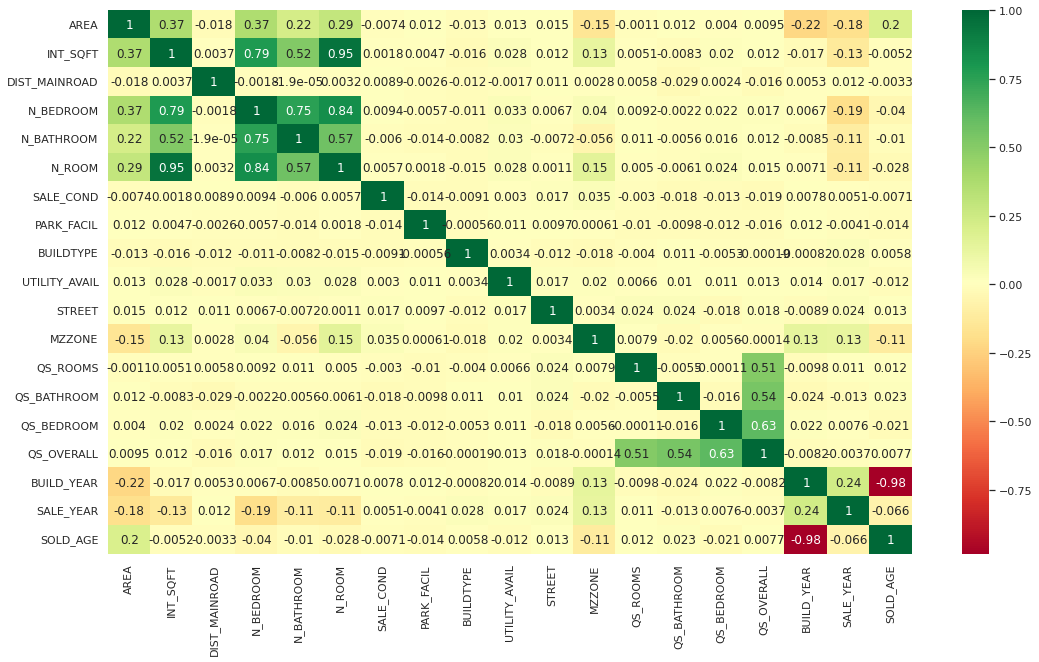

In [115]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

In [116]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [117]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))
print('This column are highly correlated with another column:',corr_features)

This column are highly correlated with another column: {'N_ROOM', 'SOLD_AGE'}


In [118]:
cwf_train=X_train.drop(corr_features,axis=1)
cwf_test=X_test.drop(corr_features,axis=1)

In [119]:
cwf_train.shape

(5687, 17)

In [120]:
train = pd.concat([cwf_train,y_train],axis=1)
test = pd.concat([cwf_test,y_test],axis=1)

In [121]:
new_df=pd.concat([train,test],axis=0)
new_df.shape
print("PREVIOUSLY THE NO. OF FEATURE IS:",df.shape)
print("NOW THE NO. OF FEATURE IS:",new_df.shape)
print("{} FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE".format(df.shape[1]-new_df.shape[1]))

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 21)
NOW THE NO. OF FEATURE IS: (7109, 18)
3 FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE


,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILD_YEAR,SALE_YEAR,SALES_PRICE
SALES_PRICE,-0.019138,0.612125,0.018783,0.330987,0.108834,-0.032762,0.146428,-0.436276,-0.015913,-0.042652,0.427789,0.021967,-0.011377,0.018804,0.020485,0.116043,0.000906,1.0


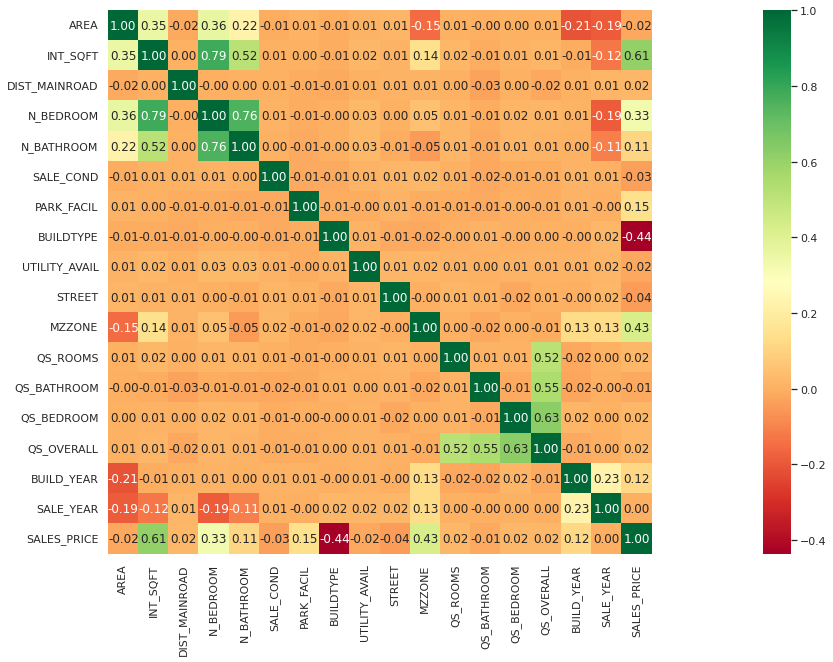

In [122]:
#correlation matrix
corrmat = new_df.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(new_df[new_df.columns[:]].corr()['SALES_PRICE'][:]).T
i=i.iloc[0]
pd.DataFrame(i).T

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
scaler=StandardScaler()
minmax=MinMaxScaler()

In [124]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

In [126]:
best_features_X = SelectKBest(score_func=f_regression,k=10).fit_transform(X,y)
# print(best_features_X.scores_)

In [127]:
correlation_list=[]
for column in X.columns:
  corr_list=pearsonr(X[column],y)
  correlation_list.append([column,corr_list[0],corr_list[1]])

In [128]:
corr_df=pd.DataFrame(correlation_list,columns=['Features','Correlation','P-Value'])
corr_df.sort_values(by='P-Value',inplace=True)
corr_df.T

,1,7,10,3,6,15,4,9,5,11,14,0,13,2,8,12,16
Features,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,DIST_MAINROAD,UTILITY_AVAIL,QS_BATHROOM,SALE_YEAR
Correlation,0.612125,-0.436276,0.427789,0.330987,0.146428,0.116043,0.108834,-0.042652,-0.032762,0.021967,0.020485,-0.019138,0.018804,0.018783,-0.015913,-0.011377,0.000906
P-Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000322,0.005734,0.064015,0.084155,0.106634,0.112895,0.113289,0.179729,0.337486,0.939123


In [129]:
model_training_feature1 = corr_df['Features']
model_training_feature1 = model_training_feature1.to_list()
model_training_feature = corr_df['Features']
model_training_feature = model_training_feature.to_list()
model_training_feature

['INT_SQFT',
 'BUILDTYPE',
 'MZZONE',
 'N_BEDROOM',
 'PARK_FACIL',
 'BUILD_YEAR',
 'N_BATHROOM',
 'STREET',
 'SALE_COND',
 'QS_ROOMS',
 'QS_OVERALL',
 'AREA',
 'QS_BEDROOM',
 'DIST_MAINROAD',
 'UTILITY_AVAIL',
 'QS_BATHROOM',
 'SALE_YEAR']

In [130]:
new_df = pd.DataFrame(new_df,columns=model_training_feature)
new_df=pd.concat([new_df,df['SALES_PRICE']],axis=1)

In [131]:
new_df.head(2)

,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,DIST_MAINROAD,UTILITY_AVAIL,QS_BATHROOM,SALE_YEAR,SALES_PRICE
0,1004,0,0,1.0,1,1967,1.0,2,0,4.0,4.330,4,4.9,131,0,3.9,2011,7600000
1,1986,0,3,2.0,0,1995,1.0,0,0,4.9,3.765,1,2.5,26,0,4.2,2006,21717770


In [132]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

In [134]:
#if VIF is more than 4 then we have change the feature. 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
r2=lr_model.score(X_train,y_train)
vif=1/(1-r2)
vif

4.579229067905988

In [135]:
df=new_df
# df.head()

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
scaler=StandardScaler()
minmax=MinMaxScaler()

In [137]:
X=new_df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

In [139]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

In [142]:
CV_Linear_regression = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.779710996117782


In [143]:
CV_XG_Boost = cross_val_score(xg_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[03:17:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:18:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:19:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [144]:
CV_RandomForest = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_RandomForest)

The cross_validation score of an XG_Boost model is: 0.7822695617162164


In [145]:
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)
print("The cross_validation score of an Random_Forest model is:",CV_RandomForest)

The cross_validation score of an Linear_Regression model is: 0.779710996117782
The cross_validation score of an XG_Boost model is: 0.9989232501412706
The cross_validation score of an Random_Forest model is: 0.7822695617162164


In [146]:
#linear regg model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [147]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [148]:
lr_y_pred=lr_model.predict(X_test)

In [149]:
print(r2_score(y_test,lr_y_pred))

0.7738778061849425


In [150]:
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                )

In [151]:
xg_model.fit(X_train_scaled,y_train)

[03:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=10000)

In [152]:
xg_y_pred=xg_model.predict(X_test_scaled)

In [153]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

XGBoost model Rsquared metric: 0.999069703163127


In [154]:
#random forest model
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)

In [155]:
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.7801258698502072


In [156]:
#model is ensemble technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)
# model4 = xg.XGBRegressor(random_state=1) 
# # we need to give the list of models that we are trying to combine
# model.fit(x_train,y_train) # to train all of the models
# preds = model.predict(x_test)
# model.score(x_test,y_test) # prediction

# model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree',model4)])
model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3)])
model.fit(X_train,y_train)
et_y_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.9581657857986533


In [157]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))
print("Ensemble Technique Rsquared metric:",r2_score(y_test,et_y_pred))
print("Random forest Regressor model Rsquared metric:",r2_score(y_test
                                                                ,rf_pred))
print("Linear Regg model Rsquared metric:",r2_score(y_test,lr_y_pred))

XGBoost model Rsquared metric: 0.999069703163127
Ensemble Technique Rsquared metric: 0.9581657857986533
Random forest Regressor model Rsquared metric: 0.7801258698502072
Linear Regg model Rsquared metric: 0.7738778061849425
